# Support Vector Machines 


O conjunto de dados da íris contém medidas de 150 flores da íris de três espécies diferentes.

As três classes no conjunto de dados Iris:

     Iris-setosa (n = 50)
     Iris-versicolor (n = 50)
     Iris-virginica (n = 50)

Os quatro recursos do conjunto de dados Iris:

     comprimento sepal em cm
     Largura sepal em cm
     comprimento da pétala em cm
     largura da pétala em cm

## Obter os dados e  Análise de dados exploratórios

In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<br>
### Procurando por dados nulos no dataset

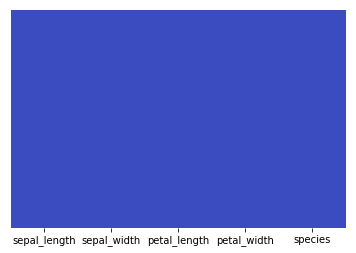

In [3]:
sns.heatmap(iris.isnull(), cmap='coolwarm', cbar=False, yticklabels=False)

## Import Necessários

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

** Pair plot com matiz para especies **

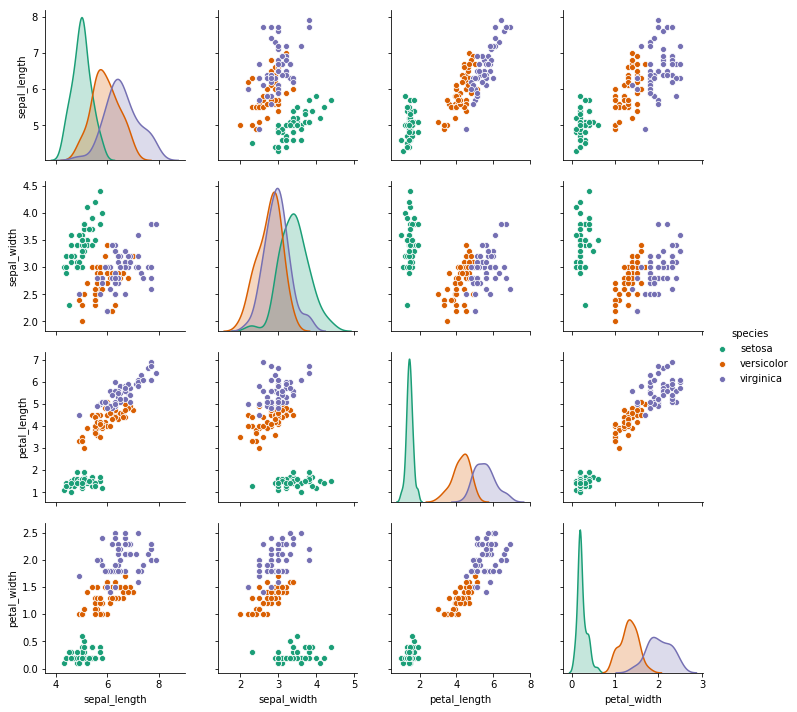

In [5]:
sns.pairplot(iris, hue='species',palette='Dark2')

** plot kde de comprimento sepal versus largura sepal para espécies de flores setosa. **

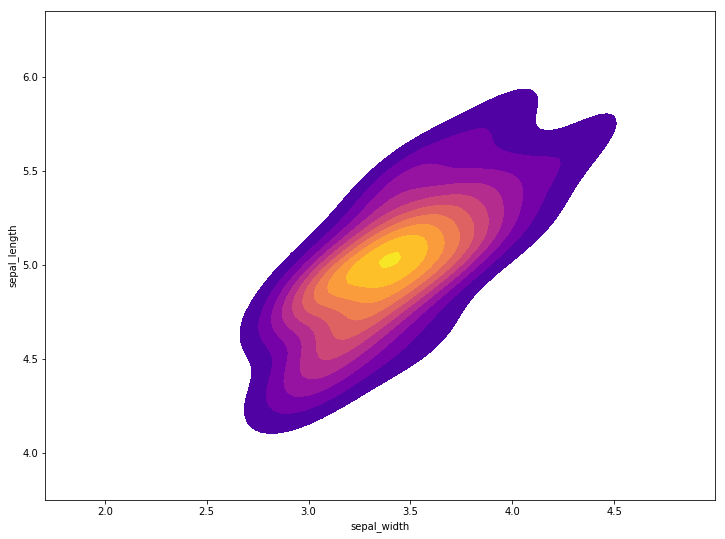

In [23]:
setosa = iris[iris['species']=='setosa']

plt.figure(figsize=(12,9))

sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

# Divisao treino-teste


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = iris.drop('species',axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Treino um modelo

Agora é hora de treinar um classificador de SVM, usando um SVC

In [9]:
from sklearn.svm import SVC

In [10]:
model = SVC()

In [11]:
model.fit(X_train, y_train)

/home/evertontomalok/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Avaliação do modelo


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
predict = model.predict(X_test)

In [14]:
pd.DataFrame(confusion_matrix(y_test, predict), columns=['setosa', 'versicolor', 'virginica'], index=['setosa', 'versicolor', 'virginica'])

,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,15,0
virginica,0,0,11


In [15]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



    - Nosso modelo performou muito bem.
    - Vamos usar o GridSearch, para tentarmosaumentar a performance de nosso modelo.

## GridsearchCV


In [16]:
from sklearn.model_selection import GridSearchCV

** param_grid **

In [17]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

** Treinando com GridSearch **

In [18]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

/home/evertontomalok/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
/home/evertontomalok/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [19]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [20]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

pd.DataFrame(confusion_matrix(y_test, predict), columns=['setosa', 'versicolor', 'virginica'], index=['setosa', 'versicolor', 'virginica'])

,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,15,0
virginica,0,0,11


In [22]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



    - Obtivemos a mesma performance